In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy import io
import matplotlib.pyplot as plt

In [2]:
def simpleClassifier(X, y, weights):
    theta_max = np.zeros(X.shape[1],dtype=np.int32)
    theta_min = np.zeros(X.shape[1],dtype=np.int32)
    threshold_ = np.zeros(X.shape[1],dtype=np.int32)
    threshold = np.zeros(X.shape[1])
    classification_error = np.zeros(X.shape[1])
    sign = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        temp = np.zeros(X.shape[0])
        indices = np.argsort(X[:,i])
        sorted_X = np.sort(X[:,i])
        sorted_targets = y[indices]
        for j in range(X.shape[0]):
            temp[j] = np.sum(sorted_targets[0:j+1])
        theta_max[i] = np.max(temp)
        theta_min[i] = np.min(temp)
        
        if(abs(theta_max[i])>abs(theta_min[i])):
            threshold_[i] = np.argwhere(temp==theta_max[i])[0]
            sign[i] = 1
        else:
            threshold_[i] = np.argwhere(temp==theta_min[i])[0]
            sign[i] = -1
        threshold[i] = sorted_X.flatten()[threshold_[i]]
    for i in range(threshold.shape[0]):
        hypo = np.zeros(X.shape[0])
        hypo[sign[i]*X[:,i] < sign[i]*threshold[i]] = 1
        hypo[hypo==0] = -1
       
        classification_error[i] = np.sum(hypo!=y.flatten())/X.shape[0]
    print(classification_error)
    dimension = np.argmin(classification_error)
    parity_sign = sign[dimension]
    threshold_value = threshold[dimension]
    return dimension, threshold_value


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_(X, Y, j, theta, text):

    # Define some helper vars for plotting
    number = len(Y)
    xmin = min(X[:, 0])
    xmax = max(X[:, 0])
    ymin = min(X[:, 1])
    ymax = max(X[:, 1])
    
    # Plot the classifier together with the data
    plt.subplot()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(text)
    plt.axis([xmin, xmax, ymin, ymax])

    plt.plot(X[:, 0:1][Y == 1], X[:, 1:2][Y == 1], c='b', marker='x', linestyle='none', markersize=5)
    plt.plot(X[:, 0:1][Y == -1], X[:, 1:2][Y == -1], c='r', marker='o', linestyle='none', markersize=5,
             fillstyle='none')

    if j == 0:  # plot
        a = np.arange(ymin, ymax, (ymax-ymin)/number)
        plt.plot(np.ones(len(a))*theta, a, 'r-')
    else:
        a = np.arange(xmin, xmax, (xmax-xmin)/number)
        plt.plot(a, np.ones(len(a))*theta, 'r-')


[0.24 0.33]
0
-1.0161290322580643


/Users/shubham/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


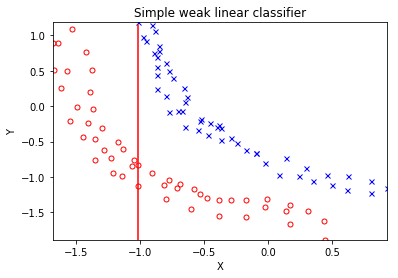

In [4]:
syn = io.loadmat('q1_adaboost_python/synthetic')  # ... or load existing dataset
X = syn['X']
Y = syn['Y']
# b) Simple weak classifier training
initial_weights = np.zeros(X.shape[0])
initial_weights[:] = 0
j, theta = simpleClassifier(X, Y, initial_weights)
print(j)
print(theta)
plt.subplot()
plot_(X, Y, j, theta, 'Simple weak linear classifier')
plt.show()